# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed = 2021
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
print ('data contains:',iris.keys(), '\n')

# Отримуємо ознаки (X), мітки класу (y), назви класів та ознак
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']

# Створюємо DataFrame із ознаками та мітками
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y

# Створюємо словник для відповідності міток та назв класів
features_dict = {k:v for k,v in  enumerate(labels)}

# Додаємо колонку з назвами класів до DataFrame
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


The best k = 1 , score = 1.0


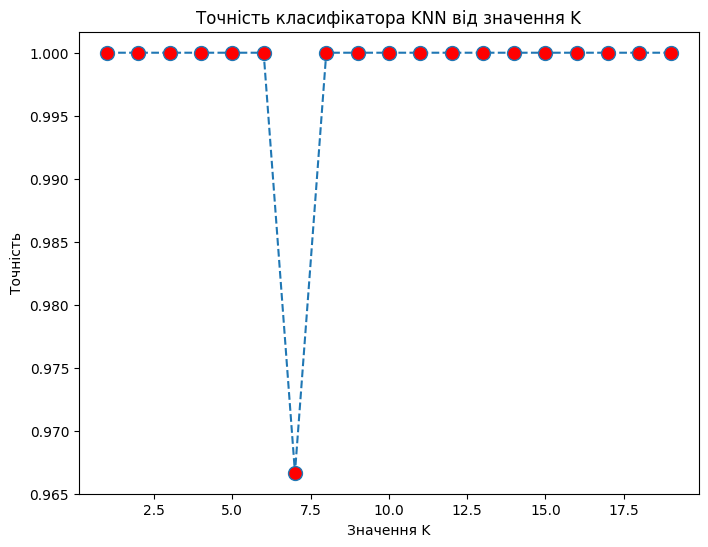

In [40]:
#k_best = None  # 'compute the best k'
#score_best = None #'compute the best score'
#print ('The best k = {} , score = {}'.format(k_best,score_best ))

# Розділення набору даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = list(range(1, 20))
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Навчання
    knn.fit(X_train, y_train)
    
    # Прогнозування міток
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({'K': k, 'Accuracy': accuracy})

# Знаходження найкращого K на основі точності
best_result = max(results, key=lambda x: x['Accuracy'])
k_best = best_result['K']
score_best = best_result['Accuracy']

# Виведення найкращого K та відповідної точності
print('The best k = {} , score = {}'.format(k_best, score_best))

# Видобуття значень K та значень точності для побудови графіку
k_values = [result['K'] for result in results]
accuracy_values = [result['Accuracy'] for result in results]

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='dashed', markerfacecolor='red', markersize=10)
plt.xlabel('Значення K')
plt.ylabel('Точність')
plt.title('Точність класифікатора KNN від значення K')
plt.show()

## Synthetic dataset  

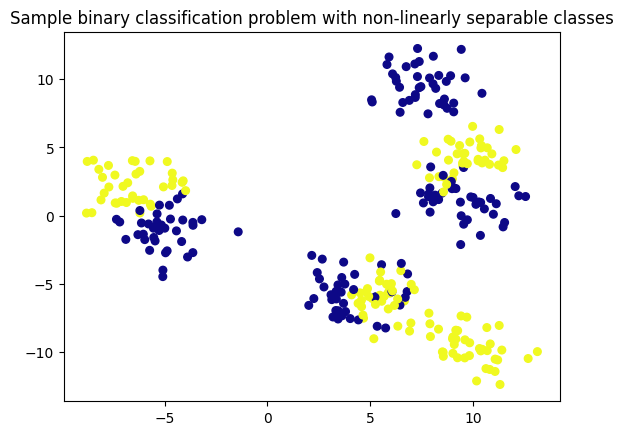

In [50]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed= 2021
%matplotlib inline

cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

#Генерація даних
X_D2, y_D2 = make_blobs(n_samples = 300,     #записи
                        n_features = 2,      #ознаки
                        centers = 8,
                        cluster_std = 1.3, 
                        random_state = 4)

y_D2 = y_D2 % 2

#вивід
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], 
            X_D2[:,1], 
            c=y_D2, 
            marker= 'o', 
            s=30, 
            cmap='plasma')

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

k_best = None # 'compute the best k'
score_best = None #'compute the best score'

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.2, random_state=42)

k_values = list(range(1, 40))
results = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'K': k, 'Accuracy': accuracy})

# compute the best k
best_result = max(results, key=lambda x: x['Accuracy'])
k_best = best_result['K']
score_best = best_result['Accuracy']

# Вивід найкращого K та відповідного score
print ('The best k = {} , score = {}'.format(k_best, score_best))

The best k = 27 , score = 0.9166666666666666


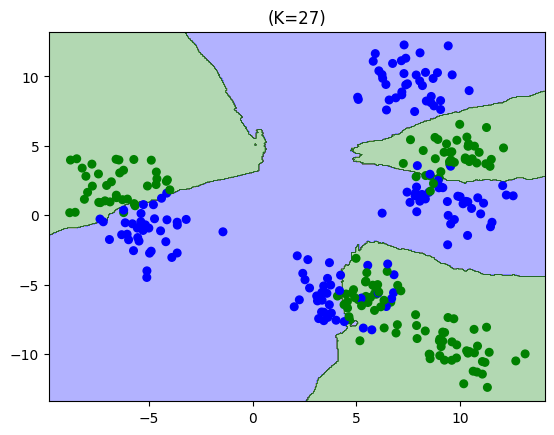

In [52]:
# visualize decision boundary 

h = .05
x_min, x_max = X_D2[:, 0].min() - 1, X_D2[:, 0].max() + 1
y_min, y_max = X_D2[:, 1].min() - 1, X_D2[:, 1].max() + 1

# Створення сітки
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h), 
    np.arange(y_min, y_max, h))

# Передбачення класів для кожної точки у сітці
knn_classifier = KNeighborsClassifier(n_neighbors=k_best)
knn_classifier.fit(X_D2, y_D2)
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#вивід
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.3)
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker='o', s=30, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('(K={})'.format(k_best))
plt.show()